In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


# Import Data

In [2]:
data = pd.read_csv('train.csv')
# data = data_dont_touch.copy(deep = True)
data.drop('Id', axis = 1, inplace = True)

In [3]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test = pd.read_csv('test.csv')

# Explore Data

In [5]:
data.shape
# 80 features to use

(1460, 80)

In [6]:
# Check missingness
missing = data.isnull().sum(axis = 0)
missing = (missing[missing != 0])/data.shape[0]
pd.DataFrame(missing, columns = ['Missing Percent']).sort_values('Missing Percent', ascending = False)


,Missing Percent
PoolQC,0.995205
MiscFeature,0.963014
Alley,0.937671
Fence,0.807534
FireplaceQu,0.472603
LotFrontage,0.177397
GarageType,0.055479
GarageYrBlt,0.055479
GarageFinish,0.055479
GarageQual,0.055479


In [7]:
data.corr()['SalePrice'].sort_values()


KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePrice, dtype: float64

In [8]:
data.corr()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


## Visualization

### MSSubClass (Categorial): the type of dwelling

Text(0, 0.5, 'Sale Price')

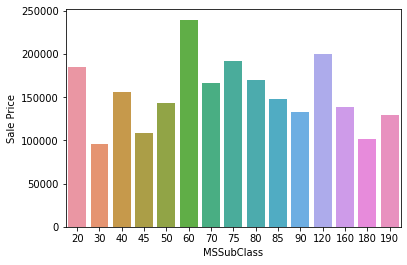

In [9]:
mssubclass = data.groupby(['MSSubClass'])['SalePrice'].mean()
fig = sns.barplot(x = mssubclass.index, y = mssubclass.values)
plt.ylabel('Sale Price')


<AxesSubplot:xlabel='MSSubClass', ylabel='count'>

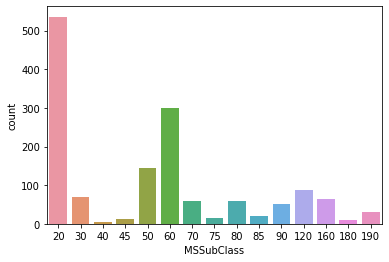

In [10]:
sns.countplot(data['MSSubClass'])

- 是不是应该onehot一下？

### MSZoning (Categorical): zoning classification 

Text(0, 0.5, 'Sale Price')

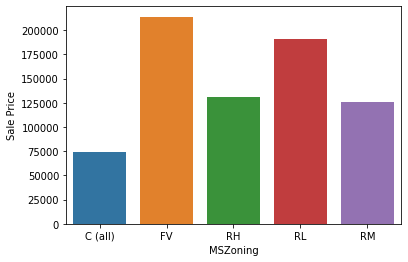

In [11]:
class_ = data.groupby(['MSZoning'])['SalePrice'].mean()
fig = sns.barplot(x = class_.index, y = class_.values)
plt.ylabel('Sale Price')


In [12]:
data['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

<AxesSubplot:xlabel='MSZoning', ylabel='count'>

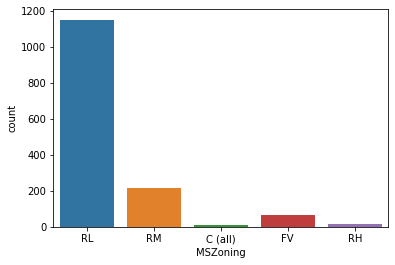

In [13]:
sns.countplot(data['MSZoning'])

- 要用onehot弄一下吗？

### LotFrontage (Numerical): Linear feet of street connected to the property

In [14]:
data['LotFrontage'].describe()
# There is outlier


count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

<AxesSubplot:xlabel='LotFrontage'>

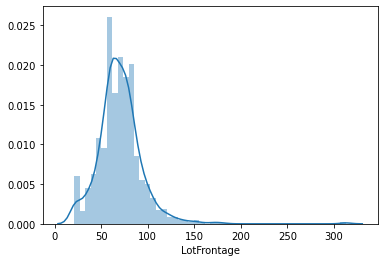

In [15]:
sns.distplot(data['LotFrontage'])


<AxesSubplot:xlabel='LotFrontage', ylabel='SalePrice'>

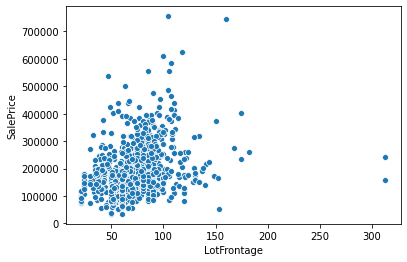

In [16]:
sns.scatterplot(x = data['LotFrontage'], y = data['SalePrice'])
# Can see a positive relationship 
# But the one with 313 LotFrontage acutally did not get a good price!

- 可以放进feature
- 是不是考虑remove outlier？

### LotArea (Numerical): Lot size in square feet 户外大小？

In [17]:
data['LotArea'].describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

<AxesSubplot:xlabel='LotArea'>

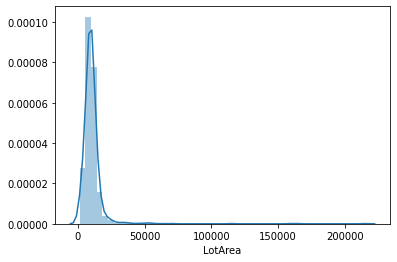

In [18]:
sns.distplot(data['LotArea'])

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

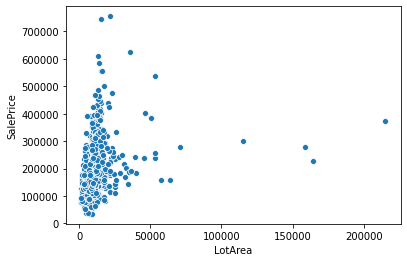

In [19]:
sns.scatterplot(x = data['LotArea'], y = data['SalePrice'])
# outlier

- Consider remove outlier

### Street (Categorical): type of raod access to property

Text(0, 0.5, 'Sale Price')

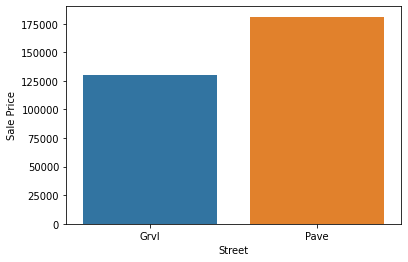

In [20]:
mssubclass = data.groupby(['Street'])['SalePrice'].mean()
fig = sns.barplot(x = mssubclass.index, y = mssubclass.values)
plt.ylabel('Sale Price')
# Gravel: 碎石
# Pave: 铺平


<AxesSubplot:xlabel='Street', ylabel='count'>

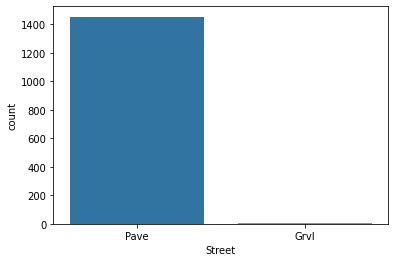

In [21]:
sns.countplot(data['Street'])

In [22]:
data.value_counts('Street')

Street
Pave    1454
Grvl       6
dtype: int64

- Consider to use

### Alley (Categorical): Type of alley access to property

In [23]:
data['Alley'] = data['Alley'].fillna('No_Alley')

Text(0, 0.5, 'Sale Price')

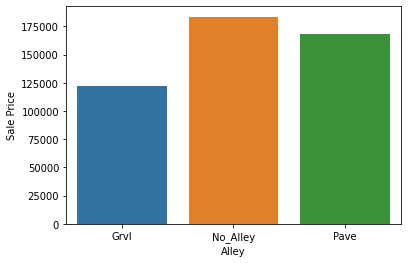

In [24]:
mssubclass = data.groupby(['Alley'])['SalePrice'].mean()
fig = sns.barplot(x = mssubclass.index, y = mssubclass.values)
plt.ylabel('Sale Price')

<AxesSubplot:xlabel='Alley', ylabel='count'>

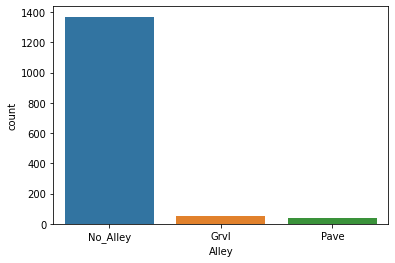

In [25]:
sns.countplot(data['Alley'])

In [258]:
data['Alley'].value_counts()

No_Alley    1369
Grvl          50
Pave          41
Name: Alley, dtype: int64

- It's obvious that if you have a valley, then Pave > Gravel
- However, the number of each type is high unbalanced

### LotShape (Categorical): General shape of property

Text(0, 0.5, 'Sale Price')

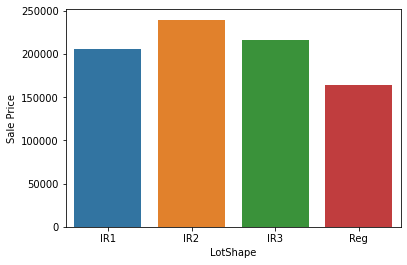

In [26]:
mssubclass = data.groupby(['LotShape'])['SalePrice'].mean()
fig = sns.barplot(x = mssubclass.index, y = mssubclass.values)
plt.ylabel('Sale Price')
# Reg: Regular
# IR1: Slightly irregular
# IR2: Moderately Irregular
# IR3: Irregular

<AxesSubplot:xlabel='LotShape', ylabel='count'>

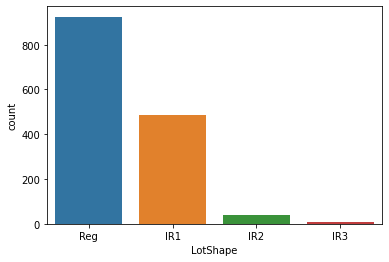

In [27]:
sns.countplot(data['LotShape'])


### LandContour (Categorical): Flatness of the property


Text(0, 0.5, 'Sale Price')

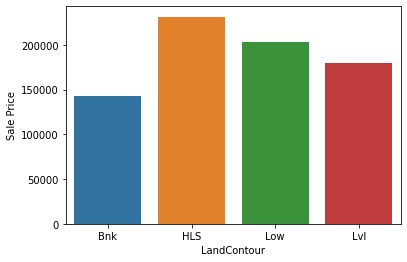

In [28]:
mssubclass = data.groupby(['LandContour'])['SalePrice'].mean()
fig = sns.barplot(x = mssubclass.index, y = mssubclass.values)
plt.ylabel('Sale Price')

# Lvl: Near Flat
# Bnk: Quick and significant rise from street grade to building
# Low: Low Depression
# HLS: Significant slope from side to side


<AxesSubplot:xlabel='LandContour', ylabel='count'>

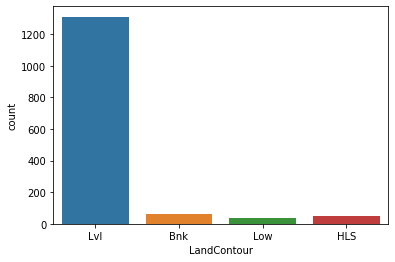

In [29]:
sns.countplot(data['LandContour'])

### Utilities (Categorical): Type of utilities available

Text(0, 0.5, 'Sale Price')

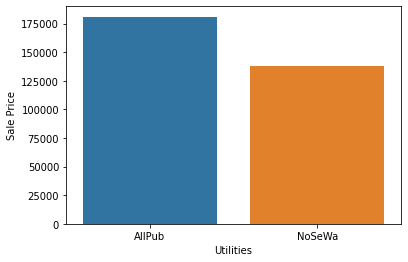

In [30]:
mssubclass = data.groupby(['Utilities'])['SalePrice'].mean()
fig = sns.barplot(x = mssubclass.index, y = mssubclass.values)
plt.ylabel('Sale Price')

# AllPub: all public utilities
# NoSeWa: Electricity of Gas Only 

<AxesSubplot:xlabel='Utilities', ylabel='count'>

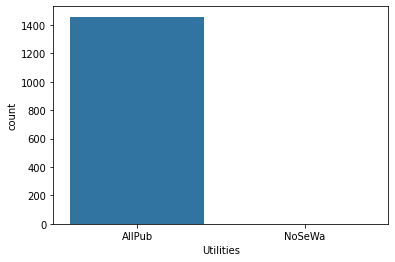

In [31]:
sns.countplot(data['Utilities'])

In [32]:
data['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

- No need to select: only 1 house is not AllPub

### LotConfig (Categorical): Lot configuration

Text(0, 0.5, 'Sale Price')

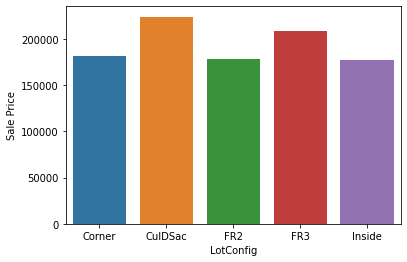

In [33]:
mssubclass = data.groupby(['LotConfig'])['SalePrice'].mean()
fig = sns.barplot(x = mssubclass.index, y = mssubclass.values)
plt.ylabel('Sale Price')

# Inside: inside lot
# Corner: corner lot
# CulDSac: Cul-de-sac
# FR2: Frontage on 2 sides of property
# FR3: Frontage on 3 sides of property

<AxesSubplot:xlabel='LotConfig', ylabel='count'>

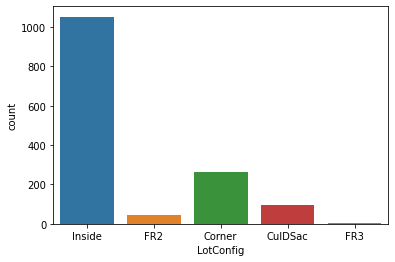

In [34]:
sns.countplot(data['LotConfig'])

### LandSlope (Categorical): Slope of property

Text(0, 0.5, 'Sale Price')

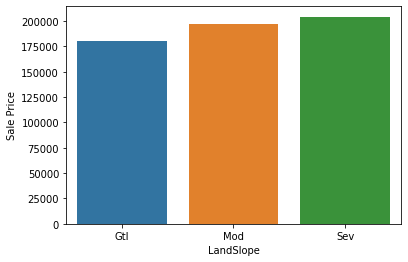

In [35]:
mssubclass = data.groupby(['LandSlope'])['SalePrice'].mean()
fig = sns.barplot(x = mssubclass.index, y = mssubclass.values)
plt.ylabel('Sale Price')



<AxesSubplot:xlabel='LandSlope', ylabel='count'>

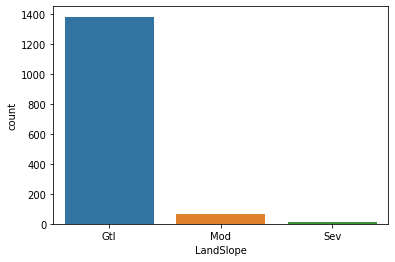

In [36]:
sns.countplot(data['LandSlope'])

In [37]:
data['LandSlope'].value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

- Maybe select

### Neighborhood (Categorical): Physical locations within Ames city limits


Text(0, 0.5, 'Sale Price')

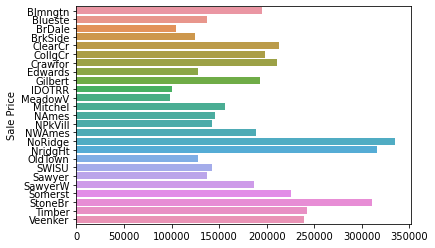

In [38]:
class_ = data.groupby(['Neighborhood'])['SalePrice'].mean()
fig = sns.barplot(y = class_.index, x = class_.values, orient='h')
plt.ylabel('Sale Price')

<AxesSubplot:xlabel='count', ylabel='Neighborhood'>

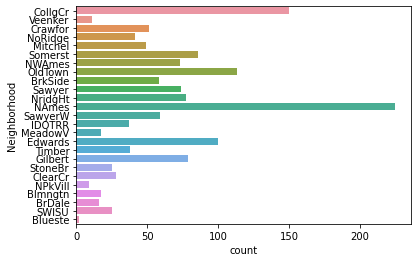

In [39]:
sns.countplot(y = data['Neighborhood'], orient='h')

- Maybe One hot?

### Condition1 

Text(0, 0.5, 'Sale Price')

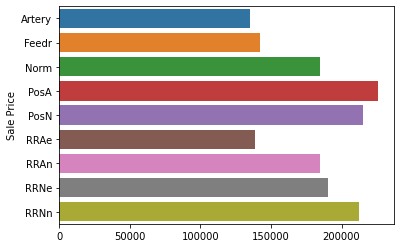

In [40]:
class_ = data.groupby(['Condition1'])['SalePrice'].mean()
fig = sns.barplot(y = class_.index, x = class_.values, orient='h')
plt.ylabel('Sale Price')

<AxesSubplot:xlabel='count', ylabel='Condition1'>

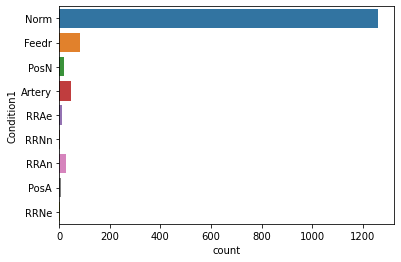

In [41]:
sns.countplot(y = data['Condition1'], orient='h')

In [42]:
data['Condition1'].value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

### Condition2

<AxesSubplot:xlabel='Condition2', ylabel='count'>

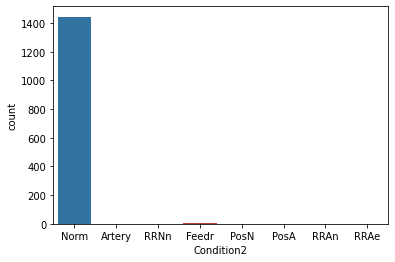

In [43]:
sns.countplot(data['Condition2'])

In [44]:
data['Condition2'].value_counts()

Norm      1445
Feedr        6
Artery       2
PosN         2
RRNn         2
PosA         1
RRAe         1
RRAn         1
Name: Condition2, dtype: int64

- Maybe not gonna use it

### BldgType (Categorical): Type of dwelling

In [45]:
data['BldgType'].value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

<AxesSubplot:xlabel='BldgType', ylabel='count'>

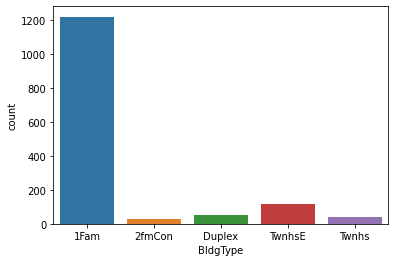

In [46]:
sns.countplot(data['BldgType'])

Text(0, 0.5, 'Sale Price')

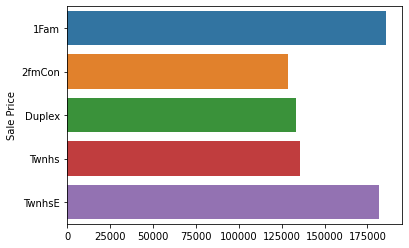

In [47]:
class_ = data.groupby(['BldgType'])['SalePrice'].mean()
fig = sns.barplot(y = class_.index, x = class_.values, orient='h')
plt.ylabel('Sale Price')

- Maybe use it

### HouseStyle (Categorical): Style of dwelling

In [48]:
data['HouseStyle'].value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

<AxesSubplot:xlabel='HouseStyle', ylabel='count'>

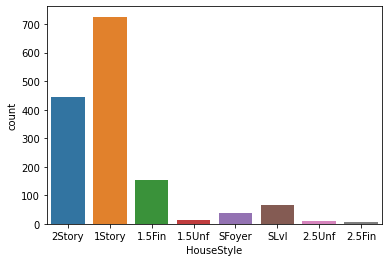

In [49]:
sns.countplot(data['HouseStyle'])

Text(0, 0.5, 'Sale Price')

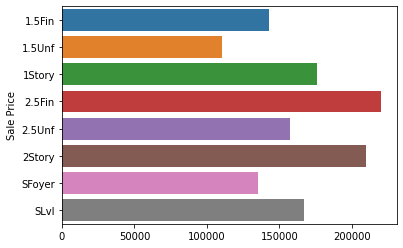

In [50]:
class_ = data.groupby(['HouseStyle'])['SalePrice'].mean()
fig = sns.barplot(y = class_.index, x = class_.values, orient='h')
plt.ylabel('Sale Price')

- Use


### OverallQual: rates the overall material and finish of the house

<AxesSubplot:xlabel='OverallQual', ylabel='count'>

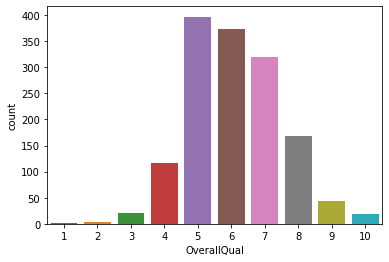

In [51]:
sns.countplot(data['OverallQual'])

Text(0, 0.5, 'Sale Price')

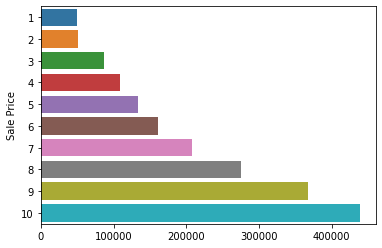

In [52]:
class_ = data.groupby(['OverallQual'])['SalePrice'].mean()
fig = sns.barplot(y = class_.index, x = class_.values, orient='h')
plt.ylabel('Sale Price')

- Definitely will use it
!

### OverallCond: Rates the overall condition of the house

<AxesSubplot:xlabel='OverallCond', ylabel='count'>

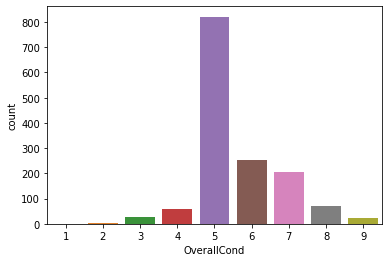

In [53]:
sns.countplot(data['OverallCond'])

Text(0, 0.5, 'Sale Price')

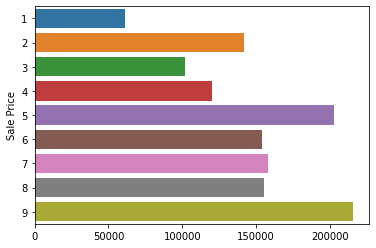

In [54]:
class_ = data.groupby(['OverallCond'])['SalePrice'].mean()
fig = sns.barplot(y = class_.index, x = class_.values, orient='h')
plt.ylabel('Sale Price')

- Maybe use it?

### YearBuilt: Original Construction date

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

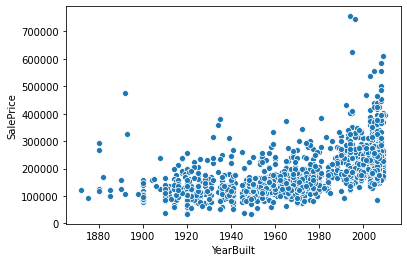

In [55]:
sns.scatterplot(data['YearBuilt'], data['SalePrice'])
# There is a overall upward trend, but not that clear

In [56]:
data[data['YearBuilt'] >= 1990]['SalePrice'].mean()

238287.26497277676

In [57]:
data[data['YearBuilt'] < 1990]['SalePrice'].mean()

146148.14411441144

### YearRemodAdd: Remodel data

<AxesSubplot:xlabel='YearRemodAdd', ylabel='SalePrice'>

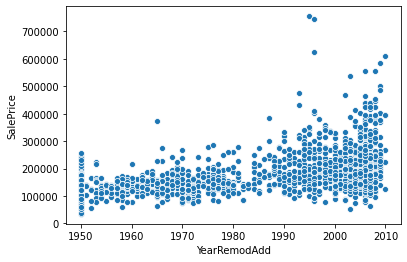

In [58]:
sns.scatterplot(data['YearRemodAdd'], data['SalePrice'])

<AxesSubplot:xlabel='YearRemodAdd'>

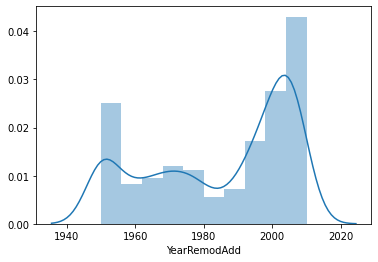

In [59]:
sns.distplot(data['YearRemodAdd'])

In [60]:
data[data['YearRemodAdd'] >= 1990]['SalePrice'].mean()

214747.92471769135

In [61]:
data[data['YearRemodAdd'] <= 1990]['SalePrice'].mean()

141580.35398230088

### New added feature: Remodel? 

In [62]:
data['has_remodel'] = has_remodel = data['YearRemodAdd'] != data['YearBuilt']

<AxesSubplot:xlabel='has_remodel', ylabel='count'>

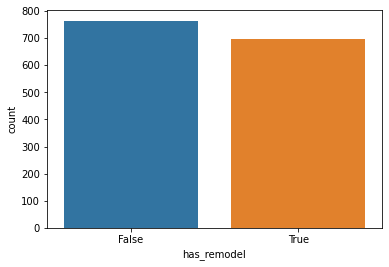

In [63]:
sns.countplot(data['has_remodel'])
# Great distribution humm..

Text(0, 0.5, 'Sale Price')

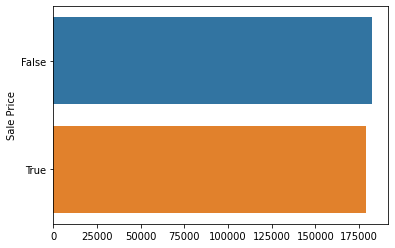

In [64]:
class_ = data.groupby(['has_remodel'])['SalePrice'].mean()
fig = sns.barplot(y = class_.index, x = class_.values, orient='h')
plt.ylabel('Sale Price')
# humm mean price doesn't make a huge difference

<AxesSubplot:xlabel='SalePrice'>

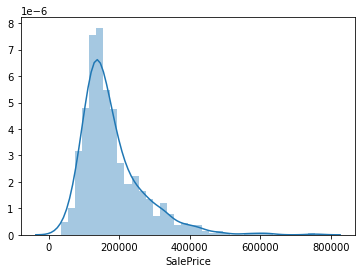

In [65]:
sns.distplot(data[data['has_remodel'] == True]['SalePrice'])

<AxesSubplot:xlabel='SalePrice'>

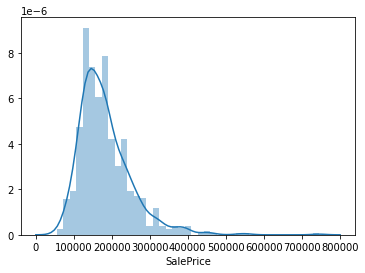

In [66]:
sns.distplot(data[data['has_remodel'] == False]['SalePrice'])

In [67]:
data[(data['YearRemodAdd'] >= 1990) & (data['has_remodel']) == True]['SalePrice'].mean()

204920.11428571428

In [68]:
data[(data['YearRemodAdd'] >= 1990) & (data['has_remodel']) == False]['SalePrice'].mean()
# Remodel has still has some influence on the price 


170056.01393034827

- Maybe we should try the `YearRemodAdd` (treated as the contruction data) + `has_remodel` 

### Roof Style (Categorical): Type of roof

Text(0, 0.5, 'Sale Price')

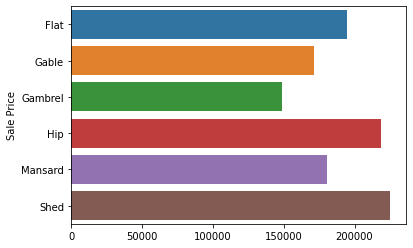

In [69]:
class_ = data.groupby(['RoofStyle'])['SalePrice'].mean()
fig = sns.barplot(y = class_.index, x = class_.values, orient='h')
plt.ylabel('Sale Price')

<AxesSubplot:xlabel='RoofStyle', ylabel='count'>

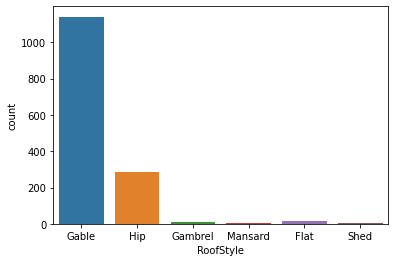

In [70]:
sns.countplot(data['RoofStyle'])

### RoofMatl (Categorical): Roof material

Text(0, 0.5, 'Sale Price')

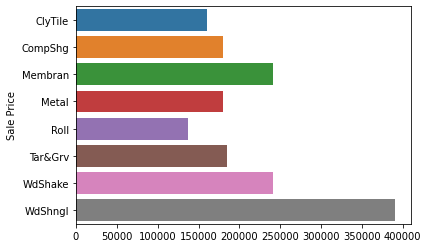

In [71]:
class_ = data.groupby(['RoofMatl'])['SalePrice'].mean()
fig = sns.barplot(y = class_.index, x = class_.values, orient='h')
plt.ylabel('Sale Price')

<AxesSubplot:xlabel='count', ylabel='RoofMatl'>

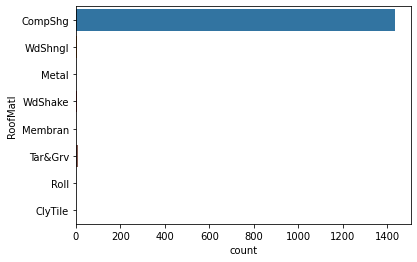

In [72]:
sns.countplot(y = data['RoofMatl'])

In [73]:
data['RoofMatl'].value_counts()
# May dont include

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Roll          1
ClyTile       1
Metal         1
Membran       1
Name: RoofMatl, dtype: int64

### Exterior1st

Text(0, 0.5, 'Sale Price')

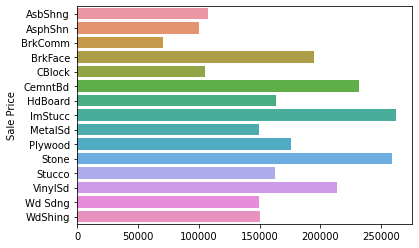

In [74]:
class_ = data.groupby(['Exterior1st'])['SalePrice'].mean()
fig = sns.barplot(y = class_.index, x = class_.values, orient='h')
plt.ylabel('Sale Price')

<AxesSubplot:xlabel='count', ylabel='Exterior1st'>

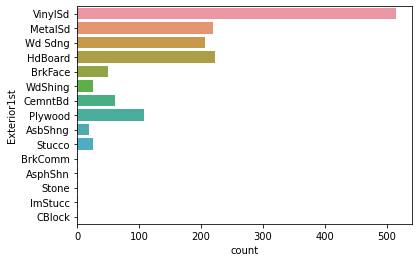

In [75]:
sns.countplot(y = data['Exterior1st'])

In [76]:
data['Exterior1st'].value_counts()
# I think we can include this 

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
Stone        2
BrkComm      2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64

### Exterior2nd

Text(0, 0.5, 'Sale Price')

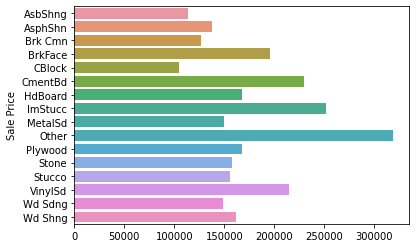

In [77]:
class_ = data.groupby(['Exterior2nd'])['SalePrice'].mean()
fig = sns.barplot(y = class_.index, x = class_.values, orient='h')
plt.ylabel('Sale Price')

<AxesSubplot:xlabel='count', ylabel='Exterior2nd'>

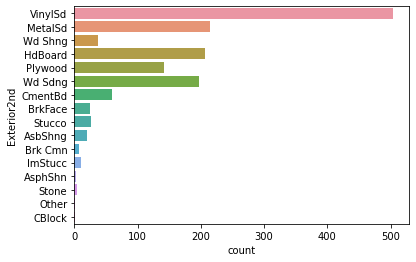

In [78]:
sns.countplot(y = data['Exterior2nd'])

In [79]:
# Maybe also include

### MasVnrType: Masonry veneer type


Text(0, 0.5, 'Sale Price')

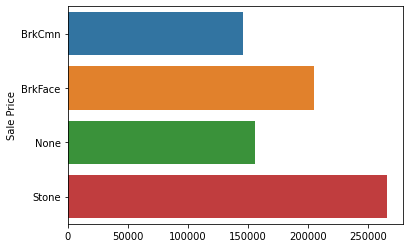

In [80]:
class_ = data.groupby(['MasVnrType'])['SalePrice'].mean()
fig = sns.barplot(y = class_.index, x = class_.values, orient='h')
plt.ylabel('Sale Price')

<AxesSubplot:xlabel='count', ylabel='MasVnrType'>

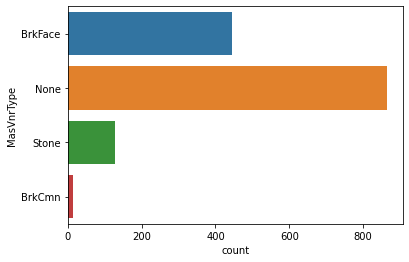

In [81]:
sns.countplot(y = data['MasVnrType'])

In [82]:
# Include?
# Notice it has some missing values

### MasVnrArea: Masonry veneer area in square feet

<AxesSubplot:xlabel='MasVnrArea', ylabel='SalePrice'>

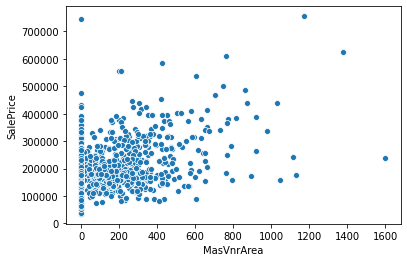

In [83]:
sns.scatterplot(data['MasVnrArea'], data['SalePrice'])

<AxesSubplot:xlabel='MasVnrArea'>

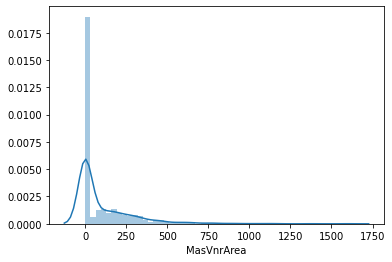

In [84]:
sns.distplot(data['MasVnrArea'])

In [85]:
data['MasVnrArea'].describe()
# Outlier notice

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

### ExterQual: Evaluates the quality of the material on the exterior 

Text(0, 0.5, 'Sale Price')

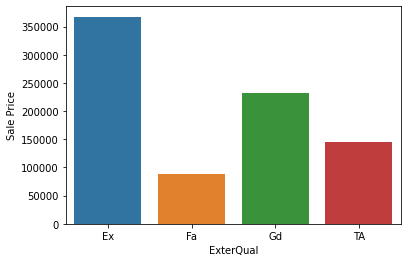

In [86]:
class_ = data.groupby(['ExterQual'])['SalePrice'].mean()
fig = sns.barplot(x = class_.index,y = class_.values)
plt.ylabel('Sale Price')

#Clear trend: Ex > Gd > Ta > Fa

<AxesSubplot:xlabel='ExterQual', ylabel='count'>

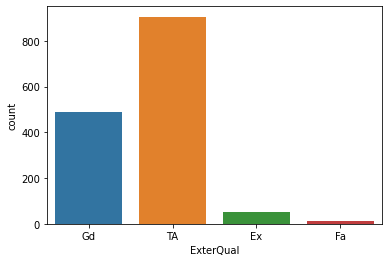

In [87]:
sns.countplot(data['ExterQual'])

In [88]:
data['ExterQual'].value_counts()

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

In [89]:
# I think use it

In [90]:
data['ExterQual'].isnull().sum() #And no missing value, perfect

0

### ExterCond: Evaluates the present condition of the material on the exterior

Text(0, 0.5, 'Sale Price')

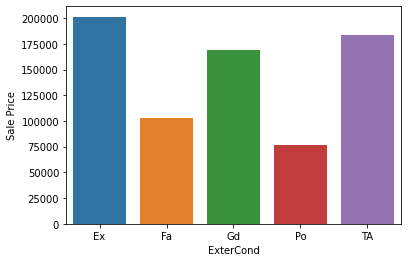

In [91]:
class_ = data.groupby(['ExterCond'])['SalePrice'].mean()
fig = sns.barplot(x = class_.index,y = class_.values)
plt.ylabel('Sale Price')

<AxesSubplot:xlabel='ExterCond', ylabel='count'>

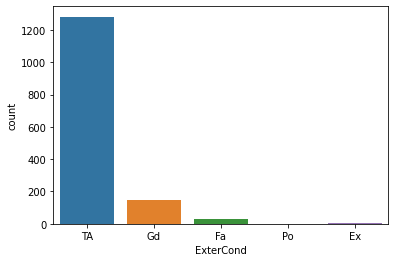

In [92]:
sns.countplot(data['ExterCond'])

In [93]:
data['ExterCond'].value_counts()

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

In [94]:
# Maybe use

### Foundation: Type of foundation

Text(0, 0.5, 'Sale Price')

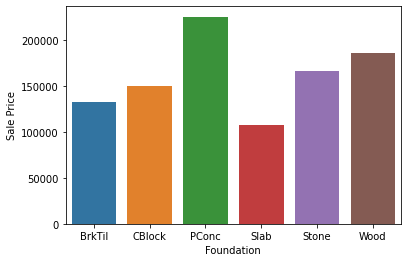

In [95]:
class_ = data.groupby(['Foundation'])['SalePrice'].mean()
fig = sns.barplot(x = class_.index,y = class_.values)
plt.ylabel('Sale Price')

#Pconc: 混凝土，好像这样高价格就说得通？

<AxesSubplot:xlabel='Foundation', ylabel='count'>

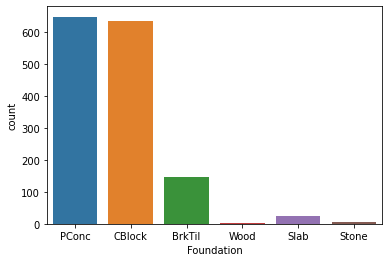

In [96]:
sns.countplot(data['Foundation'])

In [97]:
data['Foundation'].value_counts()

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

In [98]:
# Maybe use

### BsmtQual: Evaluates the height of the basement

In [99]:
data['BsmtQual'] = data['BsmtQual'].fillna('No_Basement')
# Basement: 地下室

Text(0, 0.5, 'Sale Price')

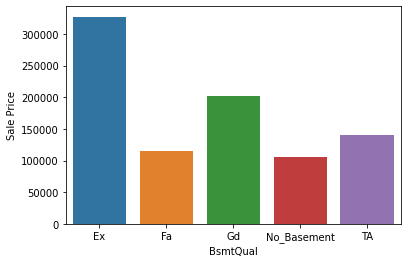

In [100]:
class_ = data.groupby(['BsmtQual'])['SalePrice'].mean()
fig = sns.barplot(x = class_.index,y = class_.values)
plt.ylabel('Sale Price')

<AxesSubplot:xlabel='BsmtQual', ylabel='count'>

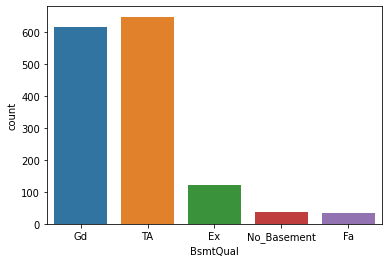

In [101]:
sns.countplot(data['BsmtQual'])

In [102]:
# Will use 

### BsmtCond: Evaluates the general condition of the basement

In [103]:
data['BsmtCond'] = data['BsmtCond'].fillna('No_Basement')

Text(0, 0.5, 'Sale Price')

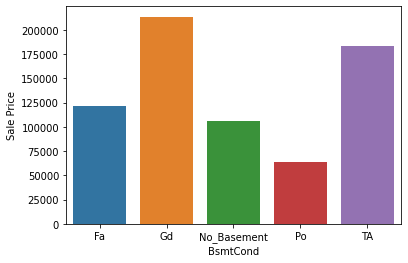

In [104]:
class_ = data.groupby(['BsmtCond'])['SalePrice'].mean()
fig = sns.barplot(x = class_.index,y = class_.values)
plt.ylabel('Sale Price')
# Also clear trend
# Maybe a new feature: has_basement

<AxesSubplot:xlabel='BsmtCond', ylabel='count'>

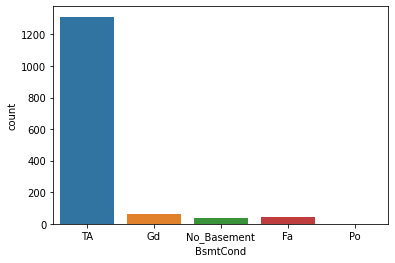

In [105]:
sns.countplot(data['BsmtCond'])

### BsmtExposure: Refers to walkout or garden level walls

In [106]:
data['BsmtExposure'] = data['BsmtExposure'].fillna('No_Basement')

Text(0, 0.5, 'Sale Price')

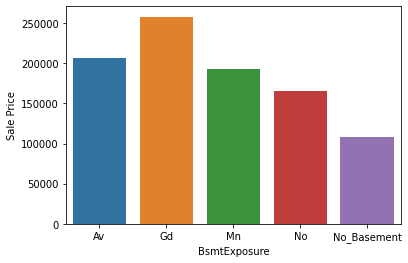

In [107]:
class_ = data.groupby(['BsmtExposure'])['SalePrice'].mean()
fig = sns.barplot(x = class_.index,y = class_.values)
plt.ylabel('Sale Price')

# Again, clear trend

<AxesSubplot:xlabel='BsmtExposure', ylabel='count'>

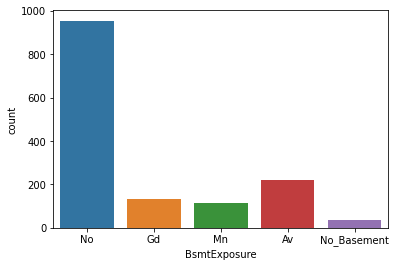

In [108]:
sns.countplot(data['BsmtExposure'])

In [109]:
# Use it
# But does it have overlap with BsmtExposure?

### BsmtFinType1: Rating of basement finished area

In [110]:
data['BsmtFinType1'] = data['BsmtFinType1'].fillna('No_Basement')

Text(0, 0.5, 'Sale Price')

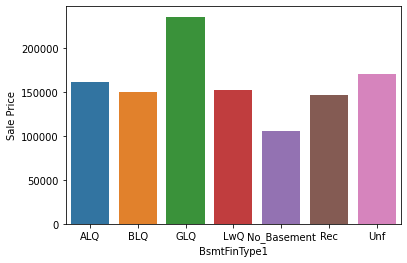

In [111]:
class_ = data.groupby(['BsmtFinType1'])['SalePrice'].mean()
fig = sns.barplot(x = class_.index,y = class_.values)
plt.ylabel('Sale Price')

# GLQ has a significant higher mean price

<AxesSubplot:xlabel='BsmtFinType1', ylabel='count'>

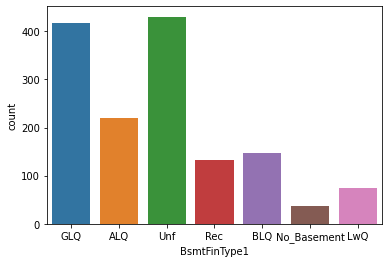

In [112]:
sns.countplot(data['BsmtFinType1'])

In [113]:
# Maybe use it

### BsmtFinSF1: Type 1 finished square feet

In [114]:
# Finished area of basement?

<AxesSubplot:xlabel='BsmtFinSF1', ylabel='SalePrice'>

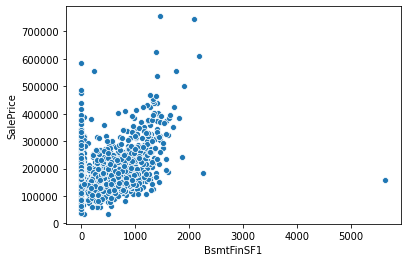

In [115]:
sns.scatterplot(data['BsmtFinSF1'], data['SalePrice'])
#0 means no basement? 

<AxesSubplot:xlabel='BsmtFinSF1'>

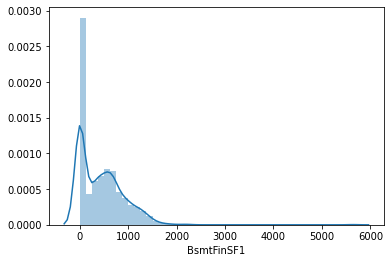

In [116]:
sns.distplot(data['BsmtFinSF1'])

In [117]:
data['BsmtFinSF1'].describe()
# Outlier

count    1460.000000
mean      443.639726
std       456.098091
min         0.000000
25%         0.000000
50%       383.500000
75%       712.250000
max      5644.000000
Name: BsmtFinSF1, dtype: float64

### BsmtFinType2: Rating of basement finished area (if multiple types)

In [118]:
data['BsmtFinType2'] = data['BsmtFinType2'].fillna('No_Basement')

Text(0, 0.5, 'Sale Price')

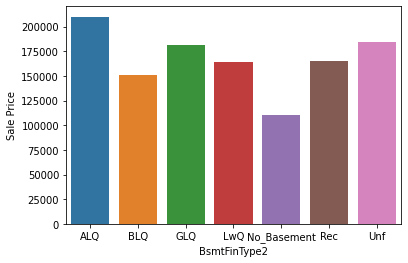

In [119]:
class_ = data.groupby(['BsmtFinType2'])['SalePrice'].mean()
fig = sns.barplot(x = class_.index,y = class_.values)
plt.ylabel('Sale Price')



<AxesSubplot:xlabel='BsmtFinType2', ylabel='count'>

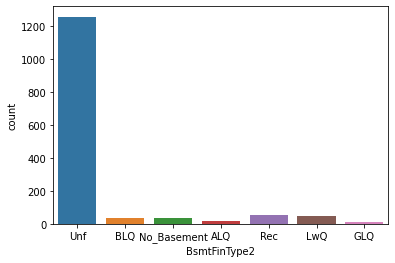

In [120]:
sns.countplot(data['BsmtFinType2'])

In [121]:
# Maybe use

### BsmtFinSF2: Type 2 finished square feet
 

<AxesSubplot:xlabel='BsmtFinSF2'>

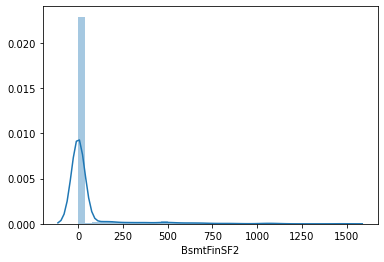

In [122]:
sns.distplot(data['BsmtFinSF2'])

In [123]:
data['BsmtFinSF2'].describe()
# Most houses don't have 2nd type basement

count    1460.000000
mean       46.549315
std       161.319273
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1474.000000
Name: BsmtFinSF2, dtype: float64

<AxesSubplot:xlabel='BsmtFinSF2', ylabel='SalePrice'>

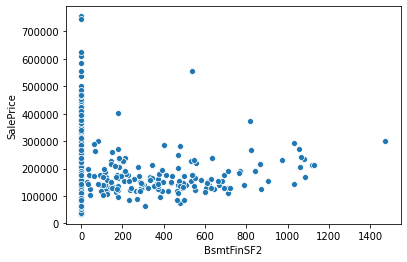

In [124]:
sns.scatterplot(data['BsmtFinSF2'], data['SalePrice'])
# 大多数没有 但是有的还是能看出一个向上的trend的


<AxesSubplot:xlabel='BsmtFinSF2', ylabel='SalePrice'>

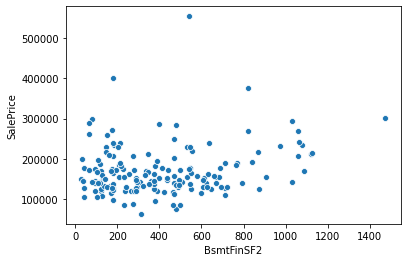

In [125]:
has_type2_basement = data[data['BsmtFinSF2'] != 0]
sns.scatterplot(has_type2_basement['BsmtFinSF2'], data['SalePrice'])
# Notice the outlier

### BsmtUnfSF: Unfinished sqaure feet of basement area

<AxesSubplot:xlabel='BsmtUnfSF'>

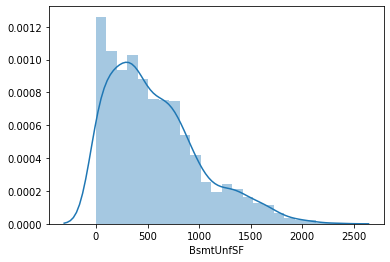

In [126]:
sns.distplot(data['BsmtUnfSF'])

In [127]:
data['BsmtUnfSF'].describe()

count    1460.000000
mean      567.240411
std       441.866955
min         0.000000
25%       223.000000
50%       477.500000
75%       808.000000
max      2336.000000
Name: BsmtUnfSF, dtype: float64

<AxesSubplot:xlabel='BsmtUnfSF', ylabel='SalePrice'>

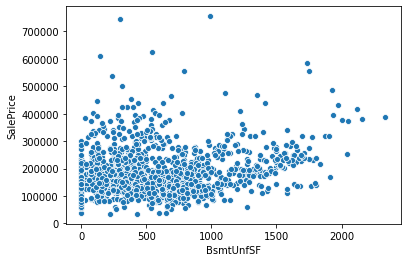

In [128]:
sns.scatterplot(data['BsmtUnfSF'], data['SalePrice'])

In [129]:
# ????

### TotalBsmtSF: Total square feet of basement area

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

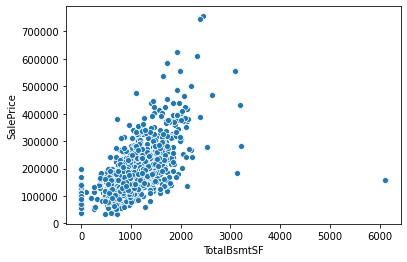

In [130]:
sns.scatterplot(data['TotalBsmtSF'], data['SalePrice'])
# Clear relationship 
# Outlier remove..

<AxesSubplot:xlabel='TotalBsmtSF'>

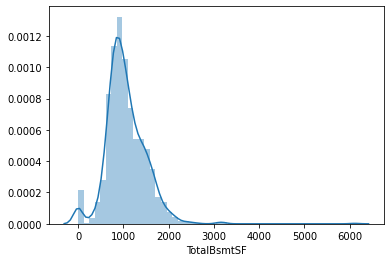

In [131]:
sns.distplot(data['TotalBsmtSF'])

In [132]:
data['TotalBsmtSF'].describe()

count    1460.000000
mean     1057.429452
std       438.705324
min         0.000000
25%       795.750000
50%       991.500000
75%      1298.250000
max      6110.000000
Name: TotalBsmtSF, dtype: float64

In [133]:
# use it

### Heating: Type of heating

<AxesSubplot:xlabel='Heating', ylabel='count'>

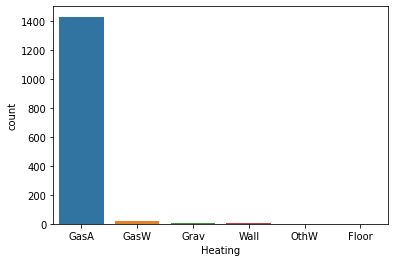

In [134]:
sns.countplot(data['Heating'])

In [135]:
data['Heating'].value_counts()

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

Text(0, 0.5, 'Sale Price')

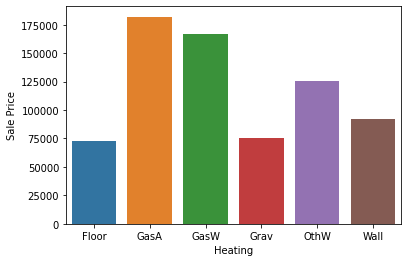

In [136]:
class_ = data.groupby(['Heating'])['SalePrice'].mean()
fig = sns.barplot(x = class_.index,y = class_.values)
plt.ylabel('Sale Price')

In [137]:
# Maybe no

### HeatingQC: Heating quality and condition

<AxesSubplot:xlabel='HeatingQC', ylabel='count'>

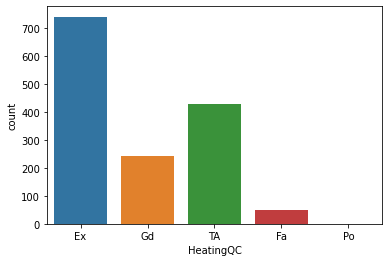

In [138]:
sns.countplot(data['HeatingQC'])

In [139]:
data['HeatingQC'].value_counts()

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

Text(0, 0.5, 'Sale Price')

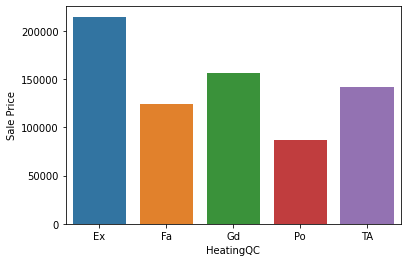

In [140]:
class_ = data.groupby(['HeatingQC'])['SalePrice'].mean()
fig = sns.barplot(x = class_.index,y = class_.values)
plt.ylabel('Sale Price')
#Yes we can see the ranking

In [141]:
# Use it.

### CentralAir: Central air conditioning


Text(0, 0.5, 'Sale Price')

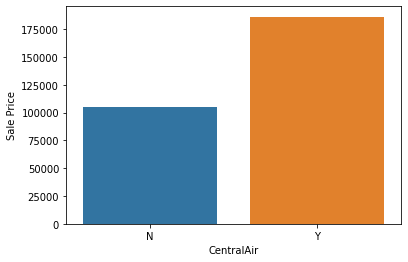

In [142]:
class_ = data.groupby(['CentralAir'])['SalePrice'].mean()
fig = sns.barplot(x = class_.index,y = class_.values)
plt.ylabel('Sale Price')

<AxesSubplot:xlabel='CentralAir', ylabel='count'>

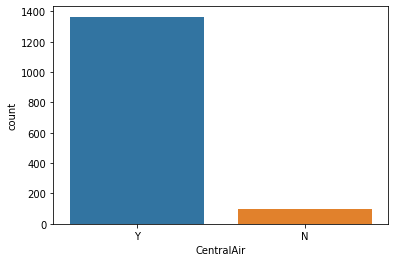

In [143]:
sns.countplot(data['CentralAir'])

In [144]:
data['CentralAir'].value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

In [145]:
# Yes include it

### Electrical: Electrical system

<AxesSubplot:xlabel='Electrical', ylabel='count'>

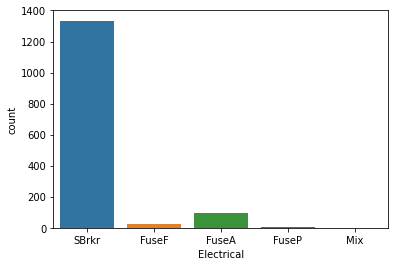

In [146]:
sns.countplot(data['Electrical'])

In [147]:
data['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

Text(0, 0.5, 'Sale Price')

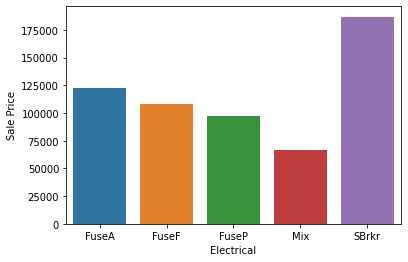

In [148]:
class_ = data.groupby(['Electrical'])['SalePrice'].mean()
fig = sns.barplot(x = class_.index,y = class_.values)
plt.ylabel('Sale Price')

In [149]:
# Yes use it

### 1stFlrSF: First Floor square feet

<AxesSubplot:xlabel='1stFlrSF'>

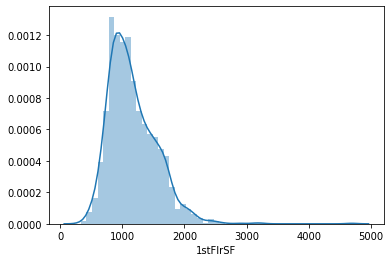

In [150]:
sns.distplot(data['1stFlrSF'])

In [151]:
data['1stFlrSF'].describe()

count    1460.000000
mean     1162.626712
std       386.587738
min       334.000000
25%       882.000000
50%      1087.000000
75%      1391.250000
max      4692.000000
Name: 1stFlrSF, dtype: float64

<AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>

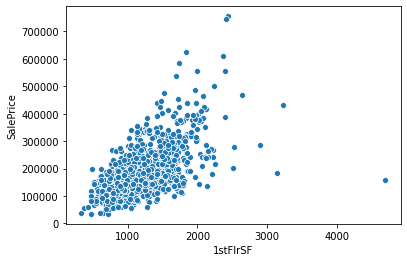

In [152]:
sns.scatterplot(data['1stFlrSF'], data['SalePrice'])
# Yes use it. 
# Remove Outlier

### 2ndFlrSF: Second floor square feet

<AxesSubplot:xlabel='2ndFlrSF'>

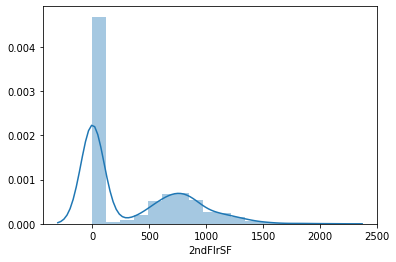

In [153]:
sns.distplot(data['2ndFlrSF'])

In [154]:
data['2ndFlrSF'].describe()
# most of them don't have second floor

count    1460.000000
mean      346.992466
std       436.528436
min         0.000000
25%         0.000000
50%         0.000000
75%       728.000000
max      2065.000000
Name: 2ndFlrSF, dtype: float64

In [155]:
has_second_floor = data[data['2ndFlrSF'] != 0]
no_second_floor = data[data['2ndFlrSF'] == 0]

<AxesSubplot:xlabel='2ndFlrSF', ylabel='SalePrice'>

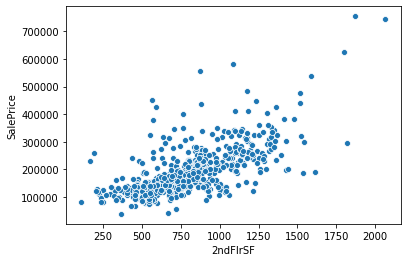

In [156]:
sns.scatterplot(has_second_floor['2ndFlrSF'], has_second_floor['SalePrice'])
#还是有点关系的

In [157]:
print(has_second_floor['SalePrice'].mean())
print(no_second_floor['SalePrice'].mean())
# 或许有没有第二层还是有影响的？

193451.47860538829
171383.6706875754


In [158]:
# Use it 
# Maybe new feature: has_second_floor

### LowQualFinSF: Low quality finished square feet (all floors)

<AxesSubplot:xlabel='LowQualFinSF'>

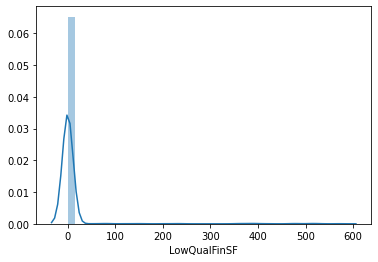

In [159]:
sns.distplot(data['LowQualFinSF'])

In [160]:
data['LowQualFinSF'].describe()

count    1460.000000
mean        5.844521
std        48.623081
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       572.000000
Name: LowQualFinSF, dtype: float64

<AxesSubplot:xlabel='LowQualFinSF', ylabel='SalePrice'>

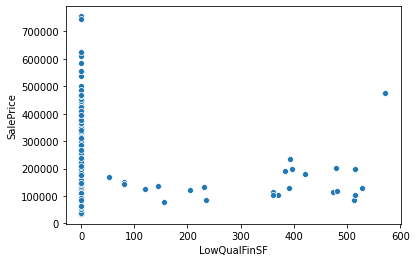

In [161]:
sns.scatterplot(data['LowQualFinSF'], data['SalePrice'])



In [162]:
# Maybe new feature: has_lowqualfinsf

### GrLivArea: Above grade (ground) living area square feet

<AxesSubplot:xlabel='GrLivArea'>

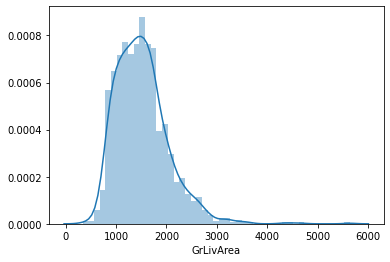

In [163]:
sns.distplot(data['GrLivArea'])

In [164]:
data['GrLivArea'].describe()

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

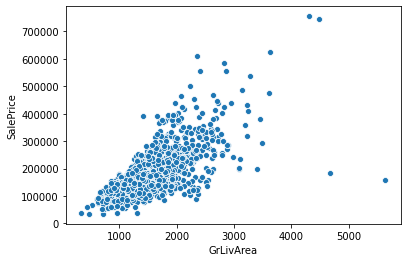

In [165]:
sns.scatterplot(data['GrLivArea'], data['SalePrice'])
# Clear trend

### BsmtFullBath: Basement full bathrooms


Text(0, 0.5, 'Sale Price')

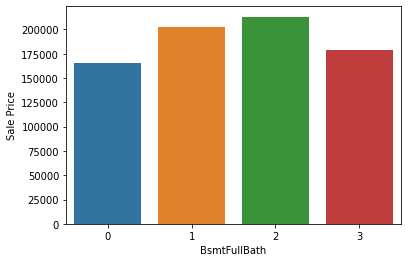

In [166]:
class_ = data.groupby(['BsmtFullBath'])['SalePrice'].mean()
fig = sns.barplot(x = class_.index,y = class_.values)
plt.ylabel('Sale Price')

In [167]:
data['BsmtFullBath'].value_counts()

0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64

In [168]:
# I think we can use it

### BsmtHalfBath: Basement half bathrooms 

Text(0, 0.5, 'Sale Price')

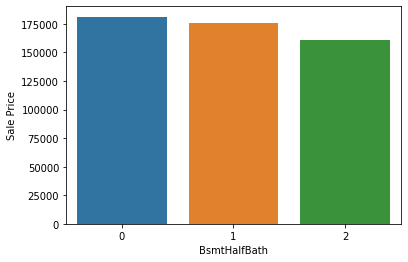

In [169]:
class_ = data.groupby(['BsmtHalfBath'])['SalePrice'].mean()
fig = sns.barplot(x = class_.index,y = class_.values)
plt.ylabel('Sale Price')

In [170]:
data['BsmtHalfBath'].value_counts()

0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64

### New feature: BsmtBath

In [171]:
data['BsmtBath'] = data['BsmtFullBath'] + 0.5 * data['BsmtHalfBath']

Text(0, 0.5, 'Sale Price')

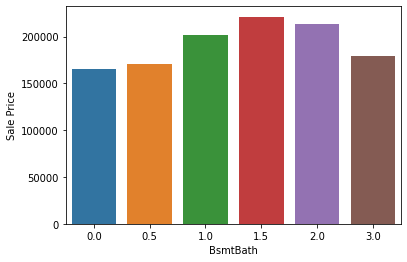

In [172]:
class_ = data.groupby(['BsmtBath'])['SalePrice'].mean()
fig = sns.barplot(x = class_.index,y = class_.values)
plt.ylabel('Sale Price')

In [173]:
# Maybe use it

### FullBath: Full bathrooms above grade

Text(0, 0.5, 'Sale Price')

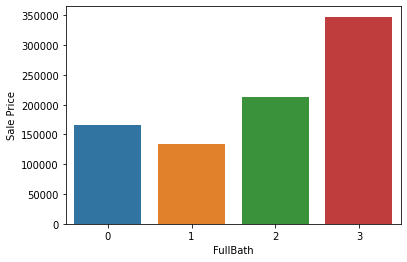

In [174]:
class_ = data.groupby(['FullBath'])['SalePrice'].mean()
fig = sns.barplot(x = class_.index,y = class_.values)
plt.ylabel('Sale Price')

In [175]:
data['FullBath'].value_counts()

2    768
1    650
3     33
0      9
Name: FullBath, dtype: int64

### HalfBath: Half baths above grade

Text(0, 0.5, 'Sale Price')

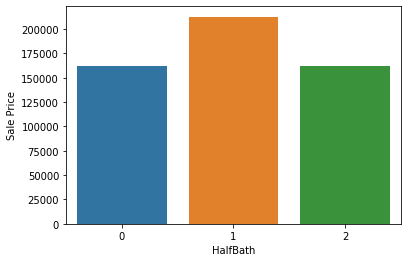

In [176]:
class_ = data.groupby(['HalfBath'])['SalePrice'].mean()
fig = sns.barplot(x = class_.index,y = class_.values)
plt.ylabel('Sale Price')

In [177]:
data['HalfBath'].value_counts()

0    913
1    535
2     12
Name: HalfBath, dtype: int64

### HalfBath: Half baths above grade

In [178]:
data['Bath'] = data['FullBath'] + 0.5 * data['HalfBath']

Text(0, 0.5, 'Sale Price')

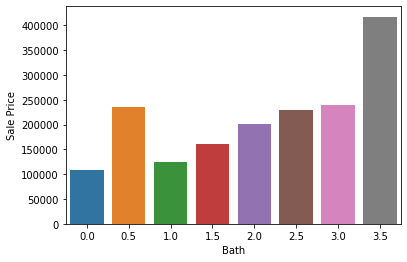

In [179]:
class_ = data.groupby(['Bath'])['SalePrice'].mean()
fig = sns.barplot(x = class_.index,y = class_.values)
plt.ylabel('Sale Price')

In [180]:
data['Bath'].value_counts()

1.0    469
2.0    433
2.5    334
1.5    180
3.0     20
3.5     18
0.0      3
0.5      3
Name: Bath, dtype: int64

In [181]:
# Maybe use it 

### BedroomAbvGr: Bedrooms above grade (does NOT include basement bedrooms)

Text(0, 0.5, 'Sale Price')

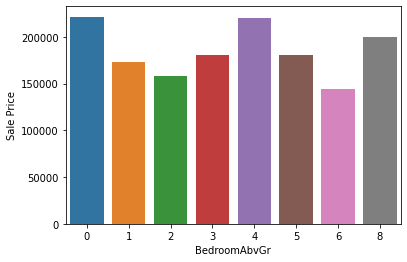

In [182]:
class_ = data.groupby(['BedroomAbvGr'])['SalePrice'].mean()
fig = sns.barplot(x = class_.index,y = class_.values)
plt.ylabel('Sale Price')

In [183]:
data['BedroomAbvGr'].value_counts().sort_index()

0      6
1     50
2    358
3    804
4    213
5     21
6      7
8      1
Name: BedroomAbvGr, dtype: int64

In [184]:
# yeah maybe include it 

### KitchenAbvGr: Kitchens above grade


Text(0, 0.5, 'Sale Price')

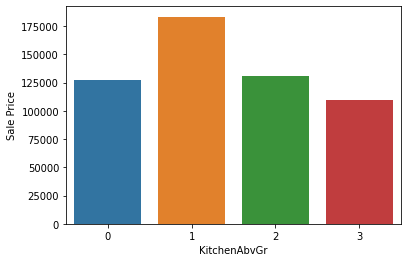

In [185]:
class_ = data.groupby(['KitchenAbvGr'])['SalePrice'].mean()
fig = sns.barplot(x = class_.index,y = class_.values)
plt.ylabel('Sale Price')

In [186]:
data['KitchenAbvGr'].value_counts().sort_index()

0       1
1    1392
2      65
3       2
Name: KitchenAbvGr, dtype: int64

### KitchenQual: Kitchen quality

Text(0, 0.5, 'Sale Price')

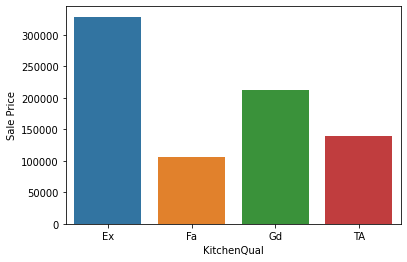

In [187]:
class_ = data.groupby(['KitchenQual'])['SalePrice'].mean()
fig = sns.barplot(x = class_.index,y = class_.values)
plt.ylabel('Sale Price')

# Clear trend

In [188]:
data['KitchenQual'].value_counts()

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

In [189]:
# Definitely use it 

### TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Text(0, 0.5, 'Sale Price')

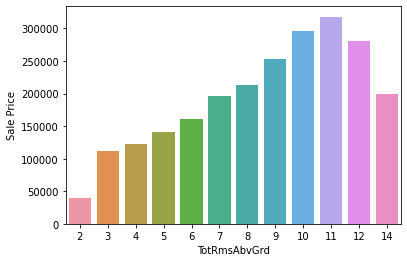

In [190]:
class_ = data.groupby(['TotRmsAbvGrd'])['SalePrice'].mean()
fig = sns.barplot(x = class_.index,y = class_.values)
plt.ylabel('Sale Price')

# Clear trend!!

In [191]:
data['TotRmsAbvGrd'].value_counts().sort_index()

# 14的是不是就是那个outlier...? 可能价格低是因为是鬼屋...???

2       1
3      17
4      97
5     275
6     402
7     329
8     187
9      75
10     47
11     18
12     11
14      1
Name: TotRmsAbvGrd, dtype: int64

### Functional: Home functionality (Assume typical unless deductions are warranted)

Text(0, 0.5, 'Sale Price')

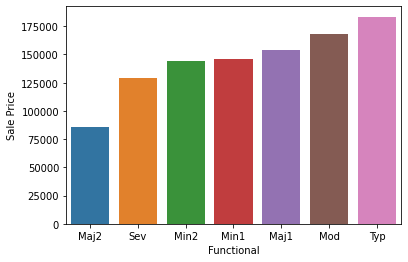

In [192]:
class_ = data.groupby(['Functional'])['SalePrice'].mean().sort_values()
fig = sns.barplot(x = class_.index,y = class_.values)
plt.ylabel('Sale Price')

In [193]:
data['Functional'].value_counts()

# Mostly typical functionality

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [194]:
# Maybe include it 

### Fireplaces: Number of fireplaces

Text(0, 0.5, 'Sale Price')

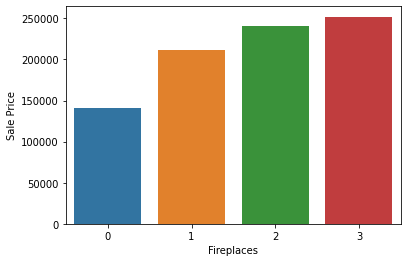

In [195]:
class_ = data.groupby(['Fireplaces'])['SalePrice'].mean().sort_values()
fig = sns.barplot(x = class_.index,y = class_.values)
plt.ylabel('Sale Price')


In [196]:
data['Fireplaces'].value_counts()

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

In [197]:
data['Fireplaces'].isnull().sum()

0

In [198]:
# Yeah use it 

### FireplaceQu: Fireplace quality

Text(0, 0.5, 'Sale Price')

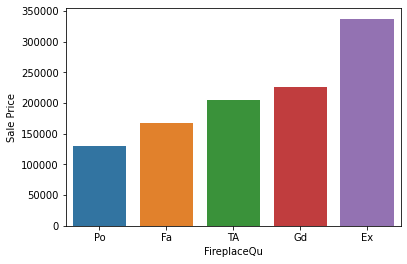

In [199]:
class_ = data.groupby(['FireplaceQu'])['SalePrice'].mean().sort_values()
fig = sns.barplot(x = class_.index,y = class_.values)
plt.ylabel('Sale Price')

# Cleary trend again 

In [200]:
data['FireplaceQu'].isnull().sum()
# But we have a lot of missing value humm...

690

### GarageType: Garage location

In [201]:
data['GarageType'] = data['GarageType'].fillna('No_Garage')

Text(0, 0.5, 'Sale Price')

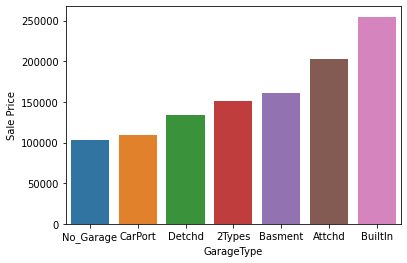

In [202]:
class_ = data.groupby(['GarageType'])['SalePrice'].mean().sort_values()
fig = sns.barplot(x = class_.index,y = class_.values)
plt.ylabel('Sale Price')

In [203]:
data['GarageType'].value_counts()

Attchd       870
Detchd       387
BuiltIn       88
No_Garage     81
Basment       19
CarPort        9
2Types         6
Name: GarageType, dtype: int64

In [204]:
# Maybe use it 
# Or new feature: has_garage

### GarageYrBlt: Year garage was built

In [205]:
data['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

<AxesSubplot:xlabel='GarageYrBlt'>

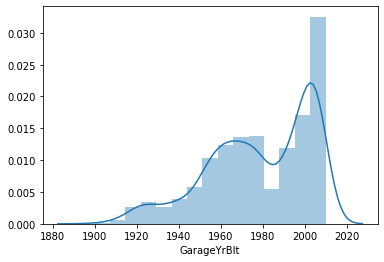

In [206]:
sns.distplot(data['GarageYrBlt'])

In [207]:
data[['YearBuilt', 'YearRemodAdd','GarageYrBlt']]
#不一定会用，大部分和yearbuilt一样，或许可以加一个"add garage later" feature

,YearBuilt,YearRemodAdd,GarageYrBlt
0,2003,2003,2003.0
1,1976,1976,1976.0
2,2001,2002,2001.0
3,1915,1970,1998.0
4,2000,2000,2000.0
...,...,...,...
1455,1999,2000,1999.0
1456,1978,1988,1978.0
1457,1941,2006,1941.0
1458,1950,1996,1950.0


### GarageFinish: Interior finish of the garage

Text(0, 0.5, 'Sale Price')

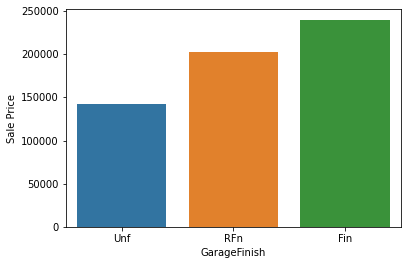

In [208]:
class_ = data.groupby(['GarageFinish'])['SalePrice'].mean().sort_values()
fig = sns.barplot(x = class_.index,y = class_.values)
plt.ylabel('Sale Price')

In [209]:
data['GarageFinish'].isnull().sum()

81

In [210]:
data['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

### GarageCars: Size of garage in car capacity

Text(0, 0.5, 'Sale Price')

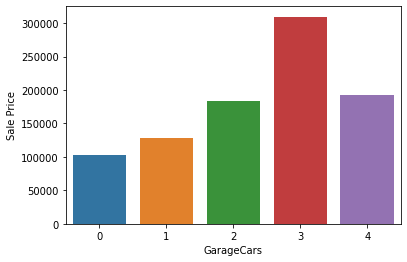

In [211]:
class_ = data.groupby(['GarageCars'])['SalePrice'].mean().sort_values()
fig = sns.barplot(x = class_.index,y = class_.values)
plt.ylabel('Sale Price')

In [212]:
data['GarageCars'].value_counts()

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64

### GarageArea: Size of garage in square feet

In [213]:
# 和上面的feature2选1

### GarageQual: Garage quality


Text(0, 0.5, 'Sale Price')

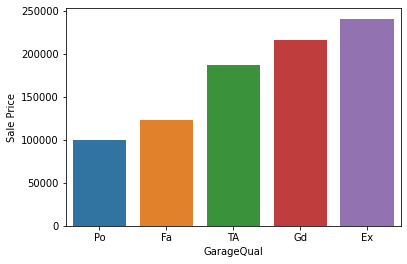

In [214]:
class_ = data.groupby(['GarageQual'])['SalePrice'].mean().sort_values()
fig = sns.barplot(x = class_.index,y = class_.values)
plt.ylabel('Sale Price')

# Clear Trend

In [215]:
data['GarageQual'].value_counts()

TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

### GarageCond: Garage condition

Text(0, 0.5, 'Sale Price')

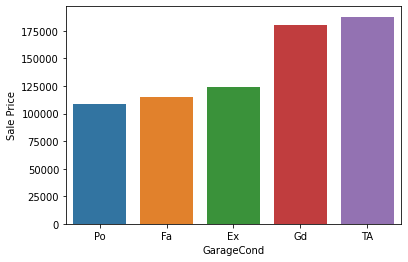

In [216]:
class_ = data.groupby(['GarageCond'])['SalePrice'].mean().sort_values()
fig = sns.barplot(x = class_.index,y = class_.values)
plt.ylabel('Sale Price')

# Clear Trend

In [217]:
data['GarageCond'].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

### PavedDrive: Paved driveway

Text(0, 0.5, 'Sale Price')

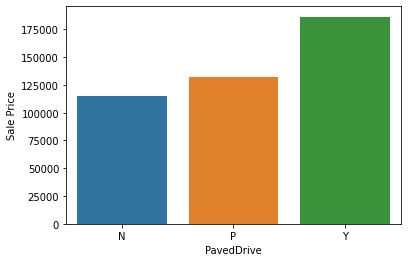

In [218]:
class_ = data.groupby(['PavedDrive'])['SalePrice'].mean().sort_values()
fig = sns.barplot(x = class_.index,y = class_.values)
plt.ylabel('Sale Price')

# Y:Paved
# P:Partial
# N:Dirt/Gravel

In [219]:
data['PavedDrive'].value_counts()

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

In [220]:
# No missing value
# Use it 

### WoodDeckSF: Wood deck area in square feet


In [221]:
data['WoodDeckSF'].isnull().sum()

0

<AxesSubplot:xlabel='WoodDeckSF'>

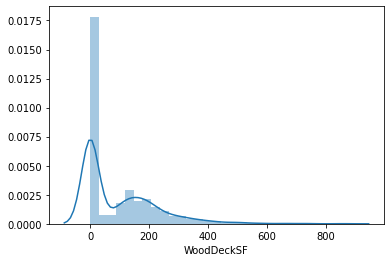

In [222]:
sns.distplot(data['WoodDeckSF'])

In [223]:
data['WoodDeckSF'].describe()

count    1460.000000
mean       94.244521
std       125.338794
min         0.000000
25%         0.000000
50%         0.000000
75%       168.000000
max       857.000000
Name: WoodDeckSF, dtype: float64

<AxesSubplot:xlabel='WoodDeckSF', ylabel='SalePrice'>

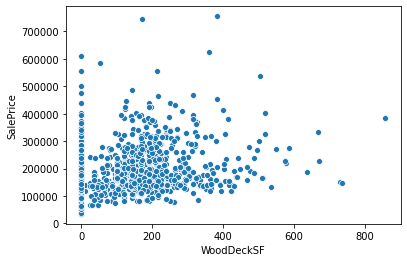

In [224]:
sns.scatterplot(data['WoodDeckSF'], data['SalePrice'])
# 感觉还是有点关系的吧

### OpenPorchSF: Open porch area in square feet

<AxesSubplot:xlabel='OpenPorchSF'>

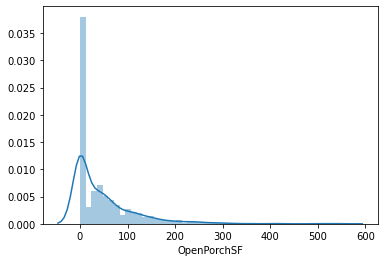

In [225]:
sns.distplot(data['OpenPorchSF'])

In [226]:
data['OpenPorchSF'].describe()

count    1460.000000
mean       46.660274
std        66.256028
min         0.000000
25%         0.000000
50%        25.000000
75%        68.000000
max       547.000000
Name: OpenPorchSF, dtype: float64

<AxesSubplot:xlabel='OpenPorchSF', ylabel='SalePrice'>

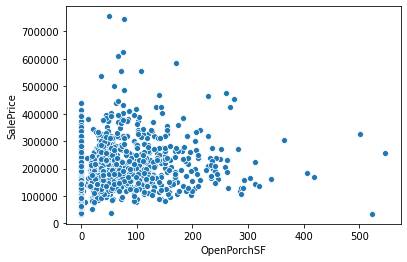

In [227]:
sns.scatterplot(data['OpenPorchSF'], data['SalePrice'])



### EnclosedPorch: Enclosed porch area in square feet


In [228]:
# Enclosed + Open = Porch Area?

<AxesSubplot:xlabel='EnclosedPorch'>

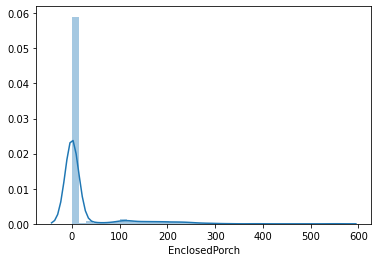

In [229]:
sns.distplot(data['EnclosedPorch'])

In [230]:
data['EnclosedPorch'].describe()

count    1460.000000
mean       21.954110
std        61.119149
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       552.000000
Name: EnclosedPorch, dtype: float64

<AxesSubplot:xlabel='EnclosedPorch', ylabel='SalePrice'>

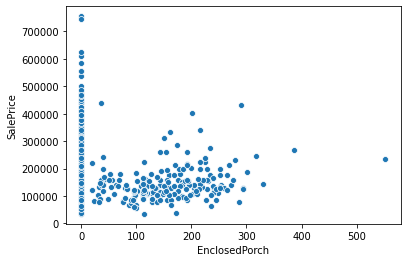

In [231]:
sns.scatterplot(data['EnclosedPorch'], data['SalePrice'])

# 还是能看出正的关系的

### 3SsnPorch: Three season porch area in square feet

In [232]:
data['3SsnPorch'].describe()

count    1460.000000
mean        3.409589
std        29.317331
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       508.000000
Name: 3SsnPorch, dtype: float64

In [233]:
data['3SsnPorch'].std()

29.31733055678188

In [234]:
(data['3SsnPorch'] == 0).mean()

0.9835616438356164

In [235]:
# 大部分都是0感觉放进去意义不大

### ScreenPorch: Screen porch area in square feet 

In [236]:
data['ScreenPorch'].describe()

count    1460.000000
mean       15.060959
std        55.757415
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       480.000000
Name: ScreenPorch, dtype: float64

In [237]:
(data['ScreenPorch'] == 0).mean()
# 一样..

0.9205479452054794

<AxesSubplot:xlabel='ScreenPorch', ylabel='SalePrice'>

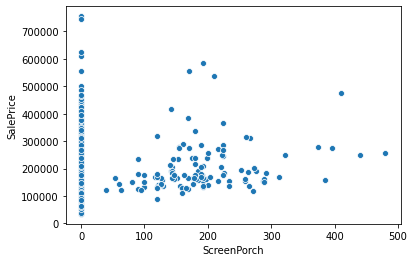

In [238]:
sns.scatterplot(data['ScreenPorch'], data['SalePrice'])

### PoolArea: Pool area in square feet 

<AxesSubplot:xlabel='PoolArea', ylabel='SalePrice'>

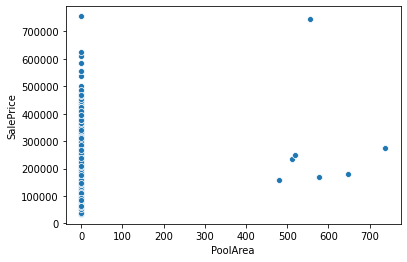

In [239]:
sns.scatterplot(data['PoolArea'], data['SalePrice'])
# 额大部分都没有pool啊，意义也不大

In [240]:
(data['PoolArea'] == 0).mean()
# 0.5% has pool, doesn't give us too much information

0.9952054794520548

### PoolQC: Pool quality


In [241]:
# 感觉也意义不大

Text(0, 0.5, 'Sale Price')

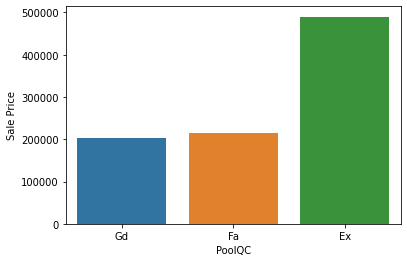

In [242]:
class_ = data.groupby(['PoolQC'])['SalePrice'].mean().sort_values()
fig = sns.barplot(x = class_.index,y = class_.values)
plt.ylabel('Sale Price')

In [243]:
data['PoolQC'].value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

### Fence: Fence quality


Text(0, 0.5, 'Sale Price')

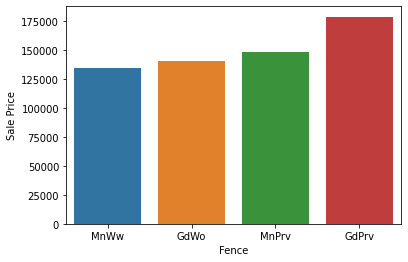

In [244]:
class_ = data.groupby(['Fence'])['SalePrice'].mean().sort_values()
fig = sns.barplot(x = class_.index,y = class_.values)
plt.ylabel('Sale Price')

In [245]:
data['Fence'].isnull().sum()
# 80% doesn't have Fence

1179

In [246]:
# Maybe new feature: has_fence

### MiscFeature: Miscellaneous feature not covered in other categories


In [247]:
# 96% missingness 
# 分类意义不大，可以搞一个有/无的feature

Text(0, 0.5, 'Sale Price')

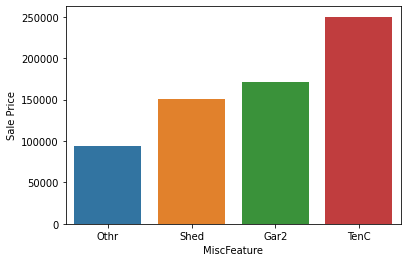

In [248]:
class_ = data.groupby(['MiscFeature'])['SalePrice'].mean().sort_values()
fig = sns.barplot(x = class_.index,y = class_.values)
plt.ylabel('Sale Price')

<AxesSubplot:xlabel='MiscFeature', ylabel='count'>

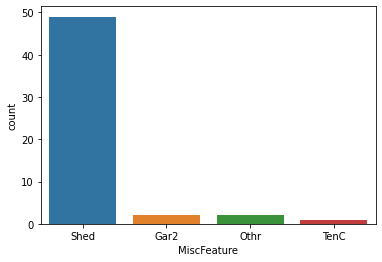

In [249]:
sns.countplot(data['MiscFeature'])

### MiscVal: Value of miscellaneous feature


In [250]:
data['MiscVal'].describe()

count     1460.000000
mean        43.489041
std        496.123024
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      15500.000000
Name: MiscVal, dtype: float64

<AxesSubplot:xlabel='MiscVal', ylabel='SalePrice'>

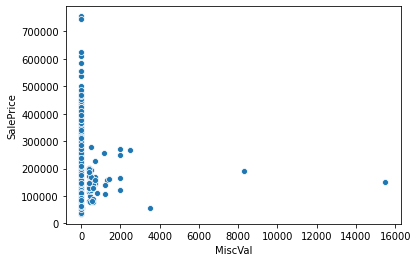

In [251]:
sns.scatterplot(data['MiscVal'], data['SalePrice'])



### MoSold: Month Sold (MM)
### YrSold: Year Sold (YYYY)

In [252]:
data[['YrSold','MoSold']]

,YrSold,MoSold
0,2008,2
1,2007,5
2,2008,9
3,2006,2
4,2008,12
...,...,...
1455,2007,8
1456,2010,2
1457,2010,5
1458,2010,4


Text(0, 0.5, 'Sale Price')

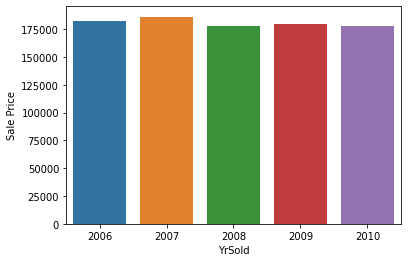

In [260]:
class_ = data.groupby(['YrSold'])['SalePrice'].mean().sort_values()
fig = sns.barplot(x = class_.index,y = class_.values)
plt.ylabel('Sale Price')

In [ ]:
class_ = data.groupby(['MoSold'])['SalePrice'].mean().sort_values()
fig = sns.barplot(x = class_.index,y = class_.values)
plt.ylabel('Sale Price')

### SaleType: Type of sale


Text(0, 0.5, 'Sale Price')

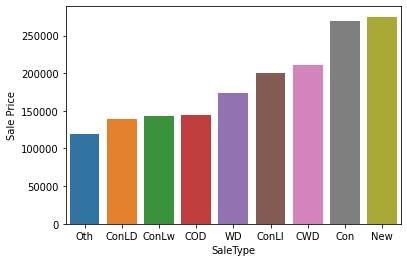

In [254]:
class_ = data.groupby(['SaleType'])['SalePrice'].mean().sort_values()
fig = sns.barplot(x = class_.index,y = class_.values)
plt.ylabel('Sale Price')

### SaleCondition: Condition of sale
 

Text(0, 0.5, 'Sale Price')

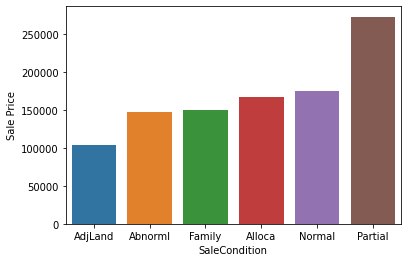

In [255]:
class_ = data.groupby(['SaleCondition'])['SalePrice'].mean().sort_values()
fig = sns.barplot(x = class_.index,y = class_.values)
plt.ylabel('Sale Price')

# Check the condition of test.csv

In [256]:
test = pd.read_csv('test.csv')

In [257]:
missing = test.isnull().sum(axis = 0)
missing = (missing[missing != 0])/test.shape[0]
pd.DataFrame(missing, columns = ['Missing Percent']).sort_values('Missing Percent', ascending = False).sort_index()

,Missing Percent
Alley,0.926662
BsmtCond,0.030843
BsmtExposure,0.030158
BsmtFinSF1,0.000685
BsmtFinSF2,0.000685
BsmtFinType1,0.028787
BsmtFinType2,0.028787
BsmtFullBath,0.001371
BsmtHalfBath,0.001371
BsmtQual,0.030158
